In [1]:
# Import packages....


import numpy as np 
import matplotlib.pyplot as plt 
import math 
import random
from scipy import stats
import datetime
import scipy
import copy
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import pandas as pd
import networkx as nx 
import matplotlib.patches as mpatches
from matplotlib.offsetbox import (DrawingArea, OffsetImage,AnnotationBbox)

# Import functions...
from definitions_clean import *


<ipython-input-1-d351b8785be8>:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


# Analysing True/False data set
We reproduce some figures from Vosoughi et al. and introduce a subsampling method to control for size. We also plot joint distributions of structural properties explicitly and count the prevalence of every possible rooted tree of size 3-6 in the data set of true and false-news cascades on Twitter.

In [6]:
# TRUE / FALSE ANALYSIS


# IMPORT data
cascade_data, cascade_data_categories = import_truefalsedata()

# Choices to make 
# ----------------

# Repeat the subsampling many times?
sample_many_times = False 

# If so, how many times?
sample_N_times = 10000

Reading metadata...


In [7]:
# Get structural distributions of full true and false data set 
# ---------------

_,topology_TRUE=sample_topology(1,cascade_data,treatment_name = 'TRUE',control_name = 'TRUE')
_,topology_FALSE=sample_topology(1,cascade_data,treatment_name = 'FALSE',control_name = 'FALSE')


_,example_cascades=sample_topology(1,cascade_data, treatment_name = 'TRUE', control_name = 'FALSE')
sample_many_times = False
if (sample_many_times == True) : 
    ''' 
    # First sample many times
    sampled_pvalues,example_cascades=sample_topology(sample_N_times,cascade_data)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_KSpvalues.npy',sampled_pvalues)
    np.save(destination+'FalseTrue_ExampleCurves.npy',result_dic)
    '''
    
    # First sample many times
    sampled_pvalues_3andabove,example_cascades_3andabove=sample_topology(sample_N_times,cascade_data,also_below_3=False)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_KSpvalues_3andabove.npy',sampled_pvalues_3andabove)
    np.save(destination+'FalseTrue_ExampleCurves_3andabove.npy',result_dic_3andabove)

sample_many_times = False
# Load results from when we sampled many times
destination='Outputs/'
sampled_pvalues = np.load(destination+'FalseTrue_KSpvalues.npy',allow_pickle = True).item()
result_dic = np.load(destination+'FalseTrue_ExampleCurves.npy',allow_pickle = True).item()    

sampled_pvalues_3andabove = np.load(destination+'FalseTrue_KSpvalues_3andabove.npy',allow_pickle = True).item()
result_dic_3andabove = np.load(destination+'FalseTrue_ExampleCurves_3andabove.npy',allow_pickle = True).item()    

# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues,features=['size','depth','max_breadth','virality'],quantile=0.05)

Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.37776666509083906 
	95.0 percent of values above: 0.7221543450461375 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999285925180587
max_breadth 
	minimum KS value: 0.9727673730572529 
	95.0 percent of values above: 0.9977246239925819 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999999450204
virality 
	minimum KS value: 0.9556477183793389 
	95.0 percent of values above: 0.9994192215024646 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.99999999999434

----------------


In [8]:
KS_make_table(cascade_data,sampled_pvalues,['size','depth','max_breadth','virality'],quantile=0.05)

\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.38 & 1.00 & 0.72 & 1.00 \\
		 Max-Breadth & 0.00 & 0.97 & 1.00 & 1.00 & 1.00 \\
		 Virality & 0.00 & 0.96 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


In [9]:
KS_make_table(cascade_data,sampled_pvalues_3andabove,['size','depth','max_breadth','virality'],quantile=0.05)

\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.00 & 1.00 & 0.00 & 0.46 \\
		 Max-Breadth & 0.00 & 0.05 & 1.00 & 0.27 & 0.91 \\
		 Virality & 0.00 & 0.05 & 1.00 & 0.35 & 0.95 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


In [10]:
# Get temporal analysis of false/true data set
# ----------------------------------------------

# Get temporal analysis for full data sets
median_timesingle = temporal_analysis_single(cascade_data)

# Sample many times
if (sample_many_times == True) : 

    # Sample N times with time series...
    gmean_dic,example_time=sample_time(sample_N_times,cascade_data,treatment_name='TRUE',control_name='FALSE')
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_mediantime.npy',median_time)
    np.save(destination+'FalseTrue_time05.npy',time05)
    np.save(destination+'FalseTrue_time95.npy',time95)

# Load results from temporal analysis...
destination='Outputs/'
median_time = np.load(destination+'FalseTrue_mediantime.npy',allow_pickle=True).item()
time05 = np.load(destination+'FalseTrue_time05.npy',allow_pickle=True).item()
time95 = np.load(destination+'FalseTrue_time95.npy',allow_pickle=True).item()



Doing experiment 0 out of 1


/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:339: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
/home/jlj/env3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Doing experiment 0 out of 1
46894


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:1568: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


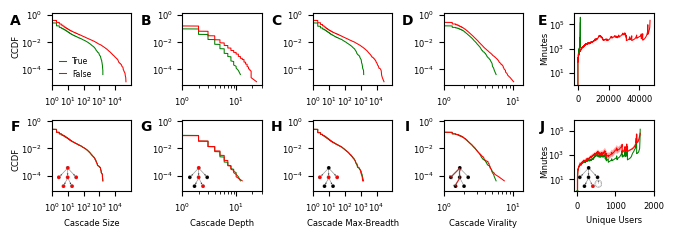

In [11]:
# PLOT:
# -------

# destinations:
destinations = ['Outputs/Figures/','../../Papers/false_and_true_news/Figures/']
FalseTrue_ccdfs(topology_TRUE,topology_FALSE,example_cascades,median_timesingle,median_time,time05,time95,destinations)
 


(0.5840414533278914, 80293.95813052385)


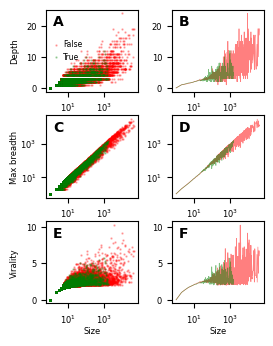

In [8]:
# Make joint distributions

cascade_scatter = get_cascade_scatter(cascade_data)
cascade_lines = get_cascade_lines(cascade_scatter,cascade_data)

FalseTrue_joint(cascade_scatter,cascade_lines,destinations)



[0.13246566500656387, 0.0006612346479040188, 0.024798121686566588, 0.13805631807350038]
[ 4.0428636  14.64280358  7.39397473  3.96018715]


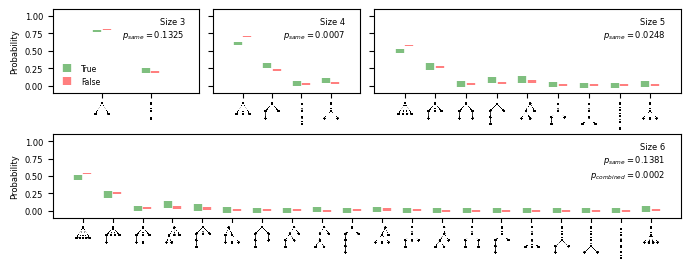

In [10]:
# Fig 3: Rooted trees

if (sample_many_times == True) :
    result_dic,stars_result_dic = count_rooted_trees()
    destination='Outputs/'
    np.save(destination+'FalseTrue_ManuallyCountedSmallCascades.npy',result_dic)
    np.save(destination+'FalseTrue_ManuallyCountedStars.npy',stars_result_dic)
    
counted_cascades = np.load(destination+'FalseTrue_ManuallyCountedSmallCascades.npy',allow_pickle = True).item()
counted_stars = np.load(destination+'FalseTrue_ManuallyCountedStars.npy',allow_pickle=True).item()

plot_vecs,p_TrueFalse_combined,p_TrueFalse_arr = rooted_trees_statistics(counted_cascades,keys=['TRUE','FALSE'])

rootedtrees_sharetick(plot_vecs,keys=['TRUE','FALSE'],colors=['g','r'],p_combined=p_TrueFalse_combined,p_arr=p_TrueFalse_arr,model_name='',destinations=destinations)

In [11]:
# Rumour categories: Political false vs other false
# --------------------------------------
print ("Rumour categories: Political false vs other false")
print("--------------------------------------\n \n")

_,topology_Other=sample_topology(1,cascade_data_categories,treatment_name = 'Other',control_name = 'Other')
_,topology_Politics=sample_topology(1,cascade_data_categories,treatment_name = 'Politics',control_name = 'Politics')

median_timesingle_categories =  temporal_analysis_single_categories(cascade_data_categories)


if (sample_many_times == True) : 
    
    # First sample many times
    
    sampled_pvalues_categories,example_cascades_categories=sample_topology(sample_N_times,cascade_data_categories,treatment_name='Other',control_name='Politics')    
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'PoliticsOther_KSpvalues.npy',sampled_pvalues_categories)
    np.save(destination+'PoliticsOther_ExampleCurves.npy',example_cascades_categories)

    
    
    # Temporal analysis..
    gmean_dic_categories,example_time_categories=sample_time(10000,cascade_data_categories,treatment_name='Other',control_name='Politics')    
    median_time_categories,time05_categories,time95_categories = temporal_analysis_categories(gmean_dic_categories)
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'PoliticsOther_mediantime.npy',median_time_categories)
    np.save(destination+'PoliticsOther_time05.npy',time05_categories)
    np.save(destination+'PoliticsOther_time95.npy',time95_categories)    
    
    # First sample many times
    sampled_pvalues_3andabove_categories,example_cascades_3andabove_categories=sample_topology(sample_N_times,cascade_data_categories,treatment_name='Other',control_name='Politics',also_below_3=False)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'FalseTrue_KSpvalues_3andabove_categories.npy',sampled_pvalues_3andabove_categories)
    np.save(destination+'FalseTrue_ExampleCurves_3andabove_categories.npy',example_cascades_3andabove_categories)

    
    
    
# Load dicts..
destination='Outputs/'
sampled_pvalues_categories = np.load(destination+'PoliticsOther_KSpvalues.npy',allow_pickle = True).item()
example_cascades_categories = np.load(destination+'PoliticsOther_ExampleCurves.npy',allow_pickle = True).item()

    
# Load dicts..
#destination='Outputs/'
#sampled_pvalues_3andabove_categories = np.load(destination+'PoliticsOther_KSpvalues_3andabove.npy',allow_pickle = True).item()
#example_cascades_3andabove_categories = np.load(destination+'PoliticsOther_ExampleCurves_3andabove.npy',allow_pickle = True).item()
    

# Load dicts..
destination='Outputs/'
median_time_categories = np.load(destination+'PoliticsOther_mediantime.npy',allow_pickle = True).item()
time05_categories = np.load(destination+'PoliticsOther_time05.npy',allow_pickle = True).item()
time95_categories = np.load(destination+'PoliticsOther_time95.npy',allow_pickle = True).item()


# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_categories,features=['size','depth','max_breadth','virality'],quantile=0.05)


Rumour categories: Political false vs other false
--------------------------------------
 

Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1


/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:339: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
/home/jlj/env3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jlj/env3/lib/python3.8/site-packages/scipy/stats/stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Doing experiment 0 out of 1
46894

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.025452990708470208 
	95.0 percent of values above: 0.104462900630786 

	maximum KS value: 0.7515533000113297 
	95.0 percent of values below: 0.42701600444873367
max_breadth 
	minimum KS value: 0.5616308505544403 
	95.0 percent of values above: 0.7475352470522824 

	maximum KS value: 0.9948285556290233 
	95.0 percent of values below: 0.9519171606433319
virality 
	minimum KS value: 0.3094369793674482 
	95.0 percent of values above: 0.5018093364248702 

	maximum KS value: 0.9727543930718318 
	95.0 percent of values below: 0.8457340070088705

----------------


In [12]:
# All cascades.
print("POLITICS / OTHER TABLE")
print("-----------------------\n\n")
KS_make_table(cascade_data_categories,sampled_pvalues_categories,['size','depth','max_breadth','virality'],quantile=0.05)

POLITICS / OTHER TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.03 & 0.75 & 0.10 & 0.43 \\
		 Max-Breadth & 0.00 & 0.56 & 0.99 & 0.75 & 0.95 \\
		 Virality & 0.00 & 0.31 & 0.97 & 0.50 & 0.85 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3053: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


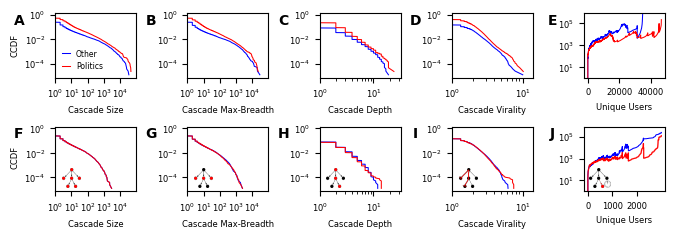

In [13]:
PoliticalOther_5ccdfs(topology_Other,topology_Politics,example_cascades_categories,median_timesingle_categories,median_time_categories,time05_categories,time95_categories,destinations)


# SIR dynamics
Next we analyze cascades produced with the SIR model for spreading processes.


In [12]:
# Import SIR DATA
cascade_data_SIR = {}
N_cascades = 30000


for R0 in [0.8,0.9] :
    filename_cascades = 'SIR_data/Cascades_Rspread%s00000_MinimumCascadeSize1.txt'%R0
    filename_measures = 'SIR_data/Measures_Cascades_Rspread%s_MinimumCascadeSize1.txt'%R0
    cascade_data_SIR = model_topology_and_size(cascade_data_SIR,R0,filename_cascades,filename_measures,N_cascades)

In [13]:
# Full data set cascade figures.
sampled_pvalues_SIR08only,example_cascades_SIR08only=sample_topology(1,cascade_data_SIR,treatment_name=0.8,control_name=0.8)
sampled_pvalues_SIR09only,example_cascades_SIR09only=sample_topology(1,cascade_data_SIR,treatment_name=0.9,control_name=0.9)


full_SIR_data = {0.8:example_cascades_SIR08only[0.8],0.9:example_cascades_SIR09only[0.9]}

# Single example of subsampling
sampled_pvalues_SIR,example_cascades_SIR=sample_topology(1,cascade_data_SIR,treatment_name=0.8,control_name=0.9)

sample_many_times = False
if (sample_many_times == True) :
    sampled_pvalues_SIR,example_cascades_SIR=sample_topology(sample_N_times,cascade_data_SIR,treatment_name=0.8,control_name=0.9)
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'SIR_KSpvalues.npy',sampled_pvalues_SIR)
    np.save(destination+'SIR_ExampleCurves.npy',example_cascades_SIR)

    # First sample many times
    sampled_pvalues_SIR_3andabove,example_cascades_SIR_3andabove=sample_topology(sample_N_times,cascade_data_SIR,treatment_name=0.8,control_name=0.9,also_below_3=False)
    
    # Now save dicts so we don't have to spend all this time again...
    destination='Outputs/'
    np.save(destination+'SIR_KSpvalues_3andabove.npy',sampled_pvalues_SIR_3andabove)
    np.save(destination+'SIR_ExampleCurves_3andabove.npy',result_dic_SIR_3andabove)    
    

# load results if we already sampled many times...
destination='Outputs/'
sampled_pvalues_SIR = np.load(destination+'SIR_KSpvalues.npy',allow_pickle = True).item()
example_cascades_SIR = np.load(destination+'SIR_ExampleCurves.npy',allow_pickle = True).item()

#sampled_pvalues_SIR_3andabove = np.load(destination+'SIR_KSpvalues_3andabove.npy',allow_pickle = True).item()
#example_cascades_SIR_3andabove = np.load(destination+'SIR_ExampleCurves_3andabovenpy',allow_pickle = True).item()


# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_SIR,features=['size','depth','max_breadth','virality'],quantile=0.05)


Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.7995154703967687 
	95.0 percent of values above: 0.9928890847283063 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.7411547894836527 
	95.0 percent of values above: 0.9928890847283063 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9876775202975292 
	95.0 percent of values above: 0.9999841632025825 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999999999913

----------------


In [14]:
print("SIR TABLE")
print("-----------------------\n\n")
KS_make_table(cascade_data_SIR,sampled_pvalues_SIR,['size','depth','max_breadth','virality'],quantile=0.05)


SIR TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.80 & 1.00 & 0.99 & 1.00 \\
		 Max-Breadth & 0.00 & 0.74 & 1.00 & 0.99 & 1.00 \\
		 Virality & 0.00 & 0.99 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


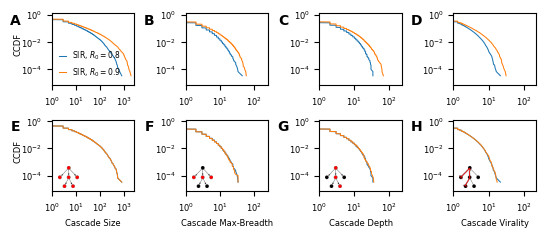

In [15]:
four_column_CCDF(full_SIR_data,example_cascades_SIR,keys=[0.8,0.9],plot_colors=['C0','C1'],model_name='SIR',fig_name='Fig',destinations=destinations)

[0.2709565986803216, 0.6719793251370667, 0.29978113854432653, 0.7426347907197812]
[2.61159325 0.79505541 2.40940522 0.59510178]


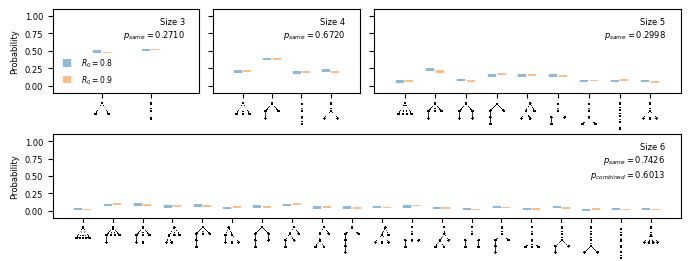

In [16]:
# Rooted trees...

# Count prevalence of rooted trees up to size 6 in False/True data set.
if (sample_many_times == True) :
    result_dic_SIR = count_rooted_trees_general()
    destination='Outputs/'
    np.save(destination+'SIR_RootedTrees_Rspread_MinimumCascadeSize1.npy',result_dic_SIR)
    #np.save(destination+'SIR_ManuallyCountedStars.npy',stars_result_dic_SIR)
    
# PLOT small cascades
counted_cascades_SIR = {0.8:{},0.9:{}}

destination='Outputs/'
counted_cascades_SIR[0.8] = np.load('Outputs/RootedTrees_Rspread0.8_MinimumCascadeSize1.npy',allow_pickle=True).item()
counted_cascades_SIR[0.9] = np.load('Outputs/RootedTrees_Rspread0.9_MinimumCascadeSize1.npy',allow_pickle=True).item()

plot_vecs_SIR,p_combined_SIR,p_arr_SIR = rooted_trees_statistics(counted_cascades_SIR,keys=[0.8,0.9])
rootedtrees_sharetick(plot_vecs_SIR,keys=[0.8,0.9],colors=['C0','C1'],p_combined=p_combined_SIR,p_arr=p_arr_SIR,model_name='SIR',destinations=destinations)

# IC model
Next we analyze cascades produced with the SIR model for spreading processes.


In [17]:
# Import SIR DATA
cascade_data_IC = {}
N_cascades = 30000


for R0 in [0.8,0.9] :
    filename_cascades = 'IC_data/ICCascades_Rspread%s00000_MinimumCascadeSize1.txt'%R0
    filename_measures = 'IC_data/Measures_ICCascades_Rspread%s_MinimumCascadeSize1.txt'%R0
    cascade_data_IC = model_topology_and_size(cascade_data_IC,R0,filename_cascades,filename_measures,N_cascades)

In [18]:
# Full data set cascade figures.
sampled_pvalues_IC08only,example_cascades_IC08only=sample_topology(1,cascade_data_IC,treatment_name=0.8,control_name=0.8)
sampled_pvalues_IC09only,example_cascades_IC09only=sample_topology(1,cascade_data_IC,treatment_name=0.9,control_name=0.9)


full_IC_data = {0.8:example_cascades_IC08only[0.8],0.9:example_cascades_IC09only[0.9]}

# Single example of subsampling
sampled_pvalues_IC,example_cascades_IC=sample_topology(1,cascade_data_IC,treatment_name=0.8,control_name=0.9)

if (sample_many_times == True) :
    sampled_pvalues_IC,example_cascades_iC=sample_topology(sample_N_times,cascade_data_IC,treatment_name=0.8,control_name=0.9)
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'IC_KSpvalues.npy',sampled_pvalues_IC)
    np.save(destination+'IC_ExampleCurves.npy',example_cascades_IC)

# load results if we already sampled many times...
destination='Outputs/'
sampled_pvalues_IC = np.load(destination+'IC_KSpvalues.npy',allow_pickle = True).item()
example_cascades_IC = np.load(destination+'IC_ExampleCurves.npy',allow_pickle = True).item()

# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_IC,features=['size','depth','max_breadth','virality'],quantile=0.05)


Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.5240614199515825 
	95.0 percent of values above: 0.9443049781694581 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999997364134
max_breadth 
	minimum KS value: 0.5438495982293685 
	95.0 percent of values above: 0.9598156380416418 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.921662839966841 
	95.0 percent of values above: 0.9962543307005353 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999939393299

----------------


In [19]:
# make table
print("IC MODEL TABLE")
print("------------------ \n\n")
KS_make_table(cascade_data_IC,sampled_pvalues_IC,['size','depth','max_breadth','virality'],quantile=0.05)

IC MODEL TABLE
------------------ 


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.52 & 1.00 & 0.94 & 1.00 \\
		 Max-Breadth & 0.00 & 0.54 & 1.00 & 0.96 & 1.00 \\
		 Virality & 0.00 & 0.92 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


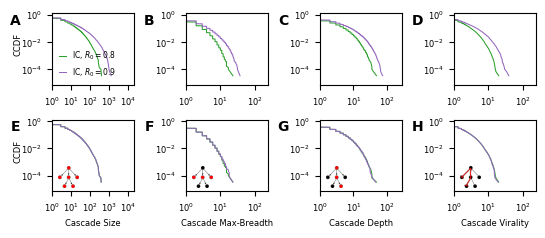

In [20]:
four_column_CCDF(full_IC_data,example_cascades_IC,keys=[0.8,0.9],plot_colors=['C2','C4'],model_name='IC',fig_name='Fig',destinations=destinations)

[0.98964636455385, 0.06639278673500393, 0.5671869564598773, 0.3116372831084474]
[0.02081521 5.42433372 1.1341326  2.33183064]


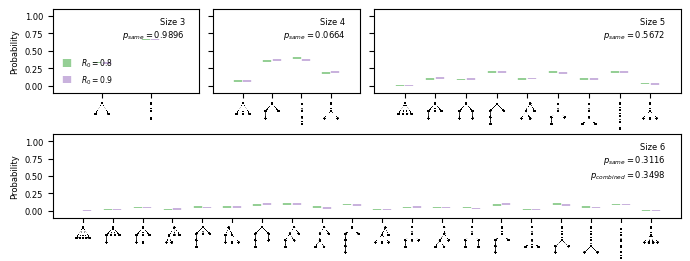

In [21]:
# Rooted trees...

# Count prevalence of rooted trees up to size 6 in False/True data set.
if (sample_many_times == True) :
    result_dic_IC = count_rooted_trees_general()
    destination='Outputs/'
    np.save(destination+'IC_RootedTrees_Rspread_MinimumCascadeSize1.npy',result_dic_IC)
    #np.save(destination+'SIR_ManuallyCountedStars.npy',stars_result_dic_SIR)
    
# PLOT small cascades
counted_cascades_IC = {0.8:{},0.9:{}}

destination='Outputs/'
counted_cascades_IC[0.8] = np.load('Outputs/ICRootedTrees_Rspread0.8_MinimumCascadeSize1.npy',allow_pickle=True).item()
counted_cascades_IC[0.9] = np.load('Outputs/ICRootedTrees_Rspread0.9_MinimumCascadeSize1.npy',allow_pickle=True).item()

plot_vecs_IC,p_combined_IC,p_arr_IC = rooted_trees_statistics(counted_cascades_IC,keys=[0.8,0.9])
rootedtrees_sharetick(plot_vecs_IC,keys=[0.8,0.9],colors=['C2','C4'],p_combined=p_combined_IC,p_arr=p_arr_IC,model_name='IC',destinations=destinations)

# Comparing IC and SIR cascades


 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 9.791231544864622e-22 
	95.0 percent of values above: 9.550445970522272e-20 

	maximum KS value: 4.4001565060721195e-15 
	95.0 percent of values below: 6.486624780457736e-17
max_breadth 
	minimum KS value: 8.296975459487012e-36 
	95.0 percent of values above: 1.7102025876713498e-32 

	maximum KS value: 2.3463295378633525e-25 
	95.0 percent of values below: 5.237749667923619e-28
virality 
	minimum KS value: 4.8783857922102975e-08 
	95.0 percent of values above: 4.2039913729912945e-07 

	maximum KS value: 3.1321174454031964e-05 
	95.0 percent of values below: 6.654354760897151e-06

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


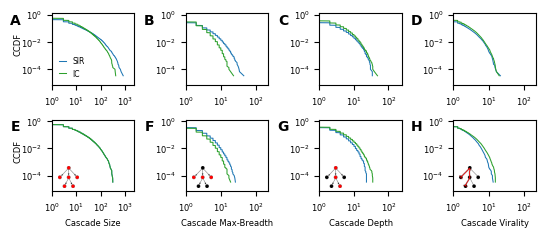

In [22]:
# First compare cascades created using R0 = 0.8
full_cascade_examplesICSIR08 = {'SIR':full_SIR_data[0.8],'IC':full_IC_data[0.8]}
#subsampled_cascade_examples = {'SIR':example_cascades_SIR[0.8],'IC':example_cascades_IC[0.8]}

cascade_data_ICSIR08 = {'SIR':cascade_data_SIR[0.8],'IC':cascade_data_IC[0.8]}

if (sample_many_times == True) :
    sampled_pvalues_ICSIR08,example_cascades_ICSIR08=sample_topology(sample_N_times,cascade_data_ICSIR08,treatment_name='IC',control_name='SIR')
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'ICSIR08_KSpvalues.npy',sampled_pvalues_ICSIR08)
    np.save(destination+'ICSIR08_ExampleCurves.npy',example_cascades_ICSIR08)

    
# load results if we already sampled many times...
destination='Outputs/'
sampled_pvalues_ICSIR08 = np.load(destination+'ICSIR08_KSpvalues.npy',allow_pickle = True).item()
example_cascades_ICSIR08 = np.load(destination+'ICSIR08_ExampleCurves.npy',allow_pickle = True).item()

# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_ICSIR08,features=['size','depth','max_breadth','virality'],quantile=0.05)



four_column_CCDF(full_cascade_examplesICSIR08,example_cascades_ICSIR08,keys=['SIR','IC'],plot_colors=['C0','C2'],model_name='ICSIR08',fig_name='Fig',destinations=destinations)


In [23]:
KS_make_table(cascade_data_ICSIR08,sampled_pvalues_ICSIR08,['size','depth','max_breadth','virality'],quantile=0.05)

\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		 Max-Breadth & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		 Virality & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}



 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 8.859271221244501e-22 
	95.0 percent of values above: 2.0307312383048162e-19 

	maximum KS value: 8.570974070609191e-15 
	95.0 percent of values below: 1.6186238899972503e-16
max_breadth 
	minimum KS value: 1.3171332217959078e-38 
	95.0 percent of values above: 4.813299738957859e-34 

	maximum KS value: 2.1860784345548713e-27 
	95.0 percent of values below: 9.914266933921448e-30
virality 
	minimum KS value: 4.840945520059655e-10 
	95.0 percent of values above: 2.6676331822960606e-09 

	maximum KS value: 1.283132883476132e-07 
	95.0 percent of values below: 3.347668102798496e-08

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


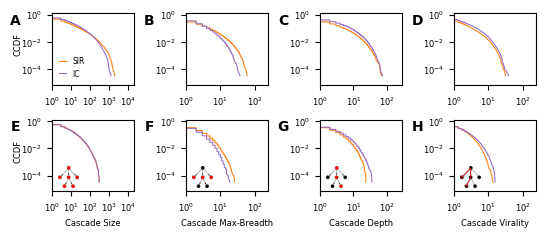

In [24]:
# Then compare cascades created using R0 = 0.9
full_cascade_examplesICSIR09 = {'SIR':full_SIR_data[0.9],'IC':full_IC_data[0.9]}
#subsampled_cascade_examples = {'SIR':example_cascades_SIR[0.8],'IC':example_cascades_IC[0.8]}

cascade_data_ICSIR09 = {'SIR':cascade_data_SIR[0.9],'IC':cascade_data_IC[0.9]}

if (sample_many_times == True) :
    sampled_pvalues_ICSIR09,example_cascades_ICSIR09=sample_topology(sample_N_times,cascade_data_ICSIR09,treatment_name='IC',control_name='SIR')
    
    # Save dicts...
    destination='Outputs/'
    np.save(destination+'ICSIR09_KSpvalues.npy',sampled_pvalues_ICSIR09)
    np.save(destination+'ICSIR09_ExampleCurves.npy',example_cascades_ICSIR09)
    
# load results if we already sampled many times...
destination='Outputs/'
sampled_pvalues_ICSIR09 = np.load(destination+'ICSIR09_KSpvalues.npy',allow_pickle = True).item()
example_cascades_ICSIR09 = np.load(destination+'ICSIR09_ExampleCurves.npy',allow_pickle = True).item()

# Examine the KS values
KS_minimum_and_quantile(sampled_pvalues_ICSIR09,features=['size','depth','max_breadth','virality'],quantile=0.05)



four_column_CCDF(full_cascade_examplesICSIR09,example_cascades_ICSIR08,keys=['SIR','IC'],plot_colors=['C1','C4'],model_name='ICSIR09',fig_name='Fig',destinations=destinations)


In [25]:
KS_make_table(cascade_data_ICSIR09,sampled_pvalues_ICSIR09,['size','depth','max_breadth','virality'],quantile=0.05)

\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		 Max-Breadth & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		 Virality & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:4401: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


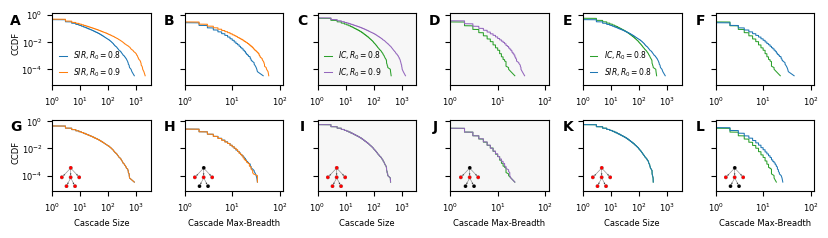

In [26]:
six_column_CCDF(example_cascades_SIR08only,example_cascades_SIR09only,example_cascades_IC08only,example_cascades_IC09only,example_cascades_SIR,example_cascades_IC,example_cascades_ICSIR08,destinations)

# On networks


In [27]:

cascades_networks = {}
cascades_sizes = {}
networks_files = {'Cornell':{0.35:'IC_data/Network_simulations/Cascades_on_network_ICMODELCornell5_Rspread0.350000_MinimumCascadeSize1.txt',
                                0.40:'IC_data/Network_simulations/Cascades_on_network_ICMODELCornell5_Rspread0.400000_MinimumCascadeSize1.txt'},
                 'athletes':{0.35:'IC_data/Network_simulations/Cascades_on_network_ICMODELathletes_edges_Rspread0.350000_MinimumCascadeSize1.txt',
                                0.40:'IC_data/Network_simulations/Cascades_on_network_ICMODELathletes_edges_Rspread0.400000_MinimumCascadeSize1.txt'}
                 
                 }
networks_files_measure = {'Cornell':{0.35:'IC_data/Network_simulations/Measures_Cascades_on_network_ICMODELCornell5_Rspread0.350000_MinimumCascadeSize1.txt',
                                0.40:'IC_data/Network_simulations/Measures_Cascades_on_network_ICMODELCornell5_Rspread0.400000_MinimumCascadeSize1.txt'},
                         'athletes':{0.35:'IC_data/Network_simulations/Measures_Cascades_on_network_ICMODELathletes_edges_Rspread0.350000_MinimumCascadeSize1.txt',
                                0.40:'IC_data/Network_simulations/Measures_Cascades_on_network_ICMODELathletes_edges_Rspread0.400000_MinimumCascadeSize1.txt'}
                         }
                  

cascades_networks,cascades_sizes=get_network_data(cascades_networks,cascades_sizes,networks_files,networks_files_measure,keys=[0.35,0.40],school='Cornell')
cascades_networks,cascades_sizes=get_network_data(cascades_networks,cascades_sizes,networks_files,networks_files_measure,keys=[0.35,0.40],school='athletes')

In [28]:
# Now sample... 

model = 'IC'

example_cascades_networks = {}
example_cascades_networks[model] = {}
#sampled_pvalues_IC_networks = {}
for school in ['Cornell','athletes'] :
    example_cascades_networks[model][school] = {'full':{}}
    for key in cascades_networks[school].keys() :
        _,example_cascades_networks[model][school]['full'][key]=sample_topology(1,cascades_networks[school],treatment_name=key,control_name=key)

if (sample_many_times == True) :
    for school in ['Cornell','athletes'] :
        example_cascades_networks[model][school] = {'subsampled':{}}

        
        keys = list(cascades_networks[school].keys())
        example_cascades_networks[model][school]['p-values'],example_cascades_networks[model][school]['subsampled']=sample_topology(sample_N_times,cascades_networks[school],treatment_name=keys[0],control_name=keys[1])
    
        # Save dicts...
        destination='Outputs/'
        np.save(destination+'%s_%s_KSpvalues.npy'%(school,model),example_cascades_networks[model][school]['p-values'])
        np.save(destination+'%s_%s_ExampleCurves.npy'%(school,model),example_cascades_networks[model][school]['subsampled'])

        
# load results if we already sampled many times...
for school in ['Cornell','athletes'] :
    destination='Outputs/'
    example_cascades_networks[model][school]['p-values'] = np.load(destination+'%s_%s_KSpvalues.npy'%(school,model),allow_pickle = True).item()
    example_cascades_networks[model][school]['subsampled'] = np.load(destination+'%s_%s_ExampleCurves.npy'%(school,model),allow_pickle = True).item()

    # Examine the KS values
    KS_minimum_and_quantile(example_cascades_networks[model][school]['p-values'],features=['size','depth','max_breadth','virality'],quantile=0.05)



Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.998133564607282 
	95.0 percent of values above: 0.9999999996109802 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.9959772899360063 
	95.0 percent of values above: 0.9999999815086086 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9999927816547227 
	95.0 percent of values above: 0.9999999996109802 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.9996732453148728 
	95.0 percent of values


 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.998133564607282 
	95.0 percent of values above: 0.9999999996109802 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.9959772899360063 
	95.0 percent of values above: 0.9999999815086086 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9999927816547227 
	95.0 percent of values above: 0.9999999996109802 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.9996732453148728 
	95.0 percent of values above: 0.9999999998595023 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.9996732453148728 
	95.0 percent of values above: 0.9999999998595023 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9998727451217517 
	95.0 percent of values above: 0.9999999964235664 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


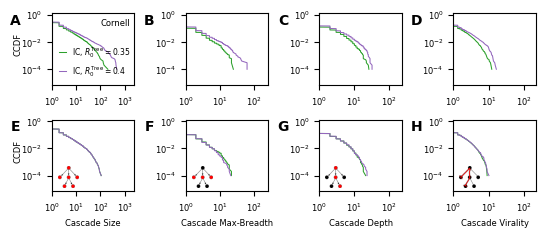

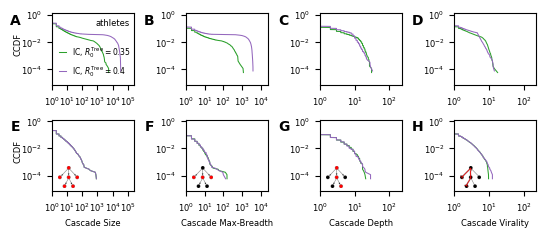

In [29]:
for school in ['Cornell','athletes'] :
    destination='Outputs/'
    example_cascades_networks[model][school]['p-values'] = np.load(destination+'%s_%s_KSpvalues.npy'%(school,model),allow_pickle = True).item()
    example_cascades_networks[model][school]['subsampled'] = np.load(destination+'%s_%s_ExampleCurves.npy'%(school,model),allow_pickle = True).item()

    example_cascades_networks[model][school]['subsampled'][0.35] = example_cascades_networks[model][school]['subsampled'][0.35]
    example_cascades_networks[model][school]['subsampled'][0.40] = example_cascades_networks[model][school]['subsampled'][0.40]
    
    # Examine the KS values
    KS_minimum_and_quantile(example_cascades_networks[model][school]['p-values'],features=['size','depth','max_breadth','virality'],quantile=0.05)
    four_column_CCDF({0.35:example_cascades_networks[model][school]['full'][0.35][0.35],0.40:example_cascades_networks[model][school]['full'][0.40][0.40]},example_cascades_networks[model][school]['subsampled'],keys=[0.35,0.40],plot_colors=['C2','C4'],model_name='IC',fig_name='Fignetwork_%s'%school,destinations=destinations,school=school)


In [30]:
for school in ['Cornell','athletes'] :
    print("IC on %s network TABLE"%school)
    print("-----------------------\n\n")    
    KS_make_table(cascades_networks[school],example_cascades_networks['IC'][school]['p-values'],['size','depth','max_breadth','virality'],quantile=0.05)

IC on Cornell network TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Max-Breadth & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Virality & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}
IC on athletes network TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Max-Breadth & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Virality & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \

In [31]:

cascades_networks = {}
cascades_sizes = {}
networks_files = {'Cornell':{0.55:'SIR_data/Network_simulations/Cascades_on_networkCornell5_Rspread0.550000_MinimumCascadeSize1.txt',
                                0.65:'SIR_data/Network_simulations/Cascades_on_networkCornell5_Rspread0.650000_MinimumCascadeSize1.txt'},
                 'athletes':{0.55:'SIR_data/Network_simulations/Cascades_on_networkathletes_edges_Rspread0.550000_MinimumCascadeSize1.txt',
                                0.65:'SIR_data/Network_simulations/Cascades_on_networkathletes_edges_Rspread0.650000_MinimumCascadeSize1.txt'}
                 
                 }
networks_files_measure = {'Cornell':{0.55:'SIR_data/Network_simulations/Measures_Cascades_on_networkCornell5_Rspread0.550000_MinimumCascadeSize1.txt',
                                0.65:'SIR_data/Network_simulations/Measures_Cascades_on_networkCornell5_Rspread0.650000_MinimumCascadeSize1.txt'},
                         'athletes':{0.55:'SIR_data/Network_simulations/Measures_Cascades_on_networkathletes_edges_Rspread0.550000_MinimumCascadeSize1.txt',
                                0.65:'SIR_data/Network_simulations/Measures_Cascades_on_networkathletes_edges_Rspread0.650000_MinimumCascadeSize1.txt'}
                         }
                  

cascades_networks,cascades_sizes=get_network_data(cascades_networks,cascades_sizes,networks_files,networks_files_measure,keys=[0.55,0.65],school='Cornell')
cascades_networks,cascades_sizes=get_network_data(cascades_networks,cascades_sizes,networks_files,networks_files_measure,keys=[0.55,0.65],school='athletes')

In [32]:
# Now sample... 

model = 'SIR'

example_cascades_networks = {}
example_cascades_networks[model] = {}
#sampled_pvalues_IC_networks = {}
for school in ['Cornell','athletes'] :
    if (school not in example_cascades_networks[model].keys()) :
        example_cascades_networks[model][school] = {}
    example_cascades_networks[model][school]['full'] = {}
    for key in cascades_networks[school].keys() :
        _,example_cascades_networks[model][school]['full'][key]=sample_topology(1,cascades_networks[school],treatment_name=key,control_name=key)
sample_many_times = False
if (sample_many_times == True) :
    for school in ['Cornell','athletes'] :
        example_cascades_networks[model][school]['subsampled']={}

        
        keys = list(cascades_networks[school].keys())
        example_cascades_networks[model][school]['p-values'],example_cascades_networks[model][school]['subsampled']=sample_topology(sample_N_times,cascades_networks[school],treatment_name=keys[0],control_name=keys[1])
    
        # Save dicts...
        destination='Outputs/'
        np.save(destination+'%s_%s_KSpvalues.npy'%(school,model),example_cascades_networks[model][school]['p-values'])
        np.save(destination+'%s_%s_ExampleCurves.npy'%(school,model),example_cascades_networks[model][school]['subsampled'])
sample_many_times = False
# load results if we already sampled many times...
for school in ['Cornell','athletes'] :
    destination='Outputs/'
    example_cascades_networks[model][school]['p-values'] = np.load(destination+'%s_%s_KSpvalues.npy'%(school,model),allow_pickle = True).item()
    example_cascades_networks[model][school]['subsampled'] = np.load(destination+'%s_%s_ExampleCurves.npy'%(school,model),allow_pickle = True).item()

    # Examine the KS values
    KS_minimum_and_quantile(example_cascades_networks[model][school]['p-values'],features=['size','depth','max_breadth','virality'],quantile=0.05)



Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1
Doing experiment 0 out of 1

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.8814006347449281 
	95.0 percent of values above: 0.9984904766727641 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999999999999
max_breadth 
	minimum KS value: 0.7309442267217465 
	95.0 percent of values above: 0.9540890605515878 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999851919316
virality 
	minimum KS value: 0.9965792747097683 
	95.0 percent of values above: 0.9999982932212885 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------

 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.9614599410


 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.8814006347449281 
	95.0 percent of values above: 0.9984904766727641 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999999999999
max_breadth 
	minimum KS value: 0.7309442267217465 
	95.0 percent of values above: 0.9540890605515878 

	maximum KS value: 1.0 
	95.0 percent of values below: 0.9999999851919316
virality 
	minimum KS value: 0.9965792747097683 
	95.0 percent of values above: 0.9999982932212885 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



 KS statistics :
----------------
size 
	minimum KS value: 1.0 
	95.0 percent of values above: 1.0 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
depth 
	minimum KS value: 0.9614599410364156 
	95.0 percent of values above: 0.9999764528825595 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
max_breadth 
	minimum KS value: 0.9384629993268137 
	95.0 percent of values above: 0.9999933052818322 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0
virality 
	minimum KS value: 0.9999764528825595 
	95.0 percent of values above: 0.9999999999999531 

	maximum KS value: 1.0 
	95.0 percent of values below: 1.0

----------------
[  1  10 100]


/home/jlj/Dropbox/PhD/Structural_virality/Aral_method_test/definitions_clean.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


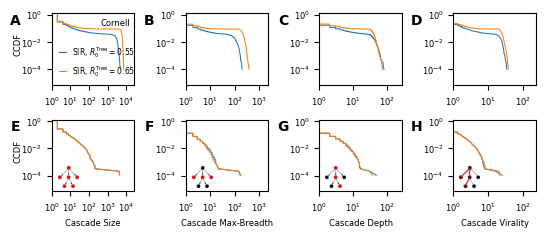

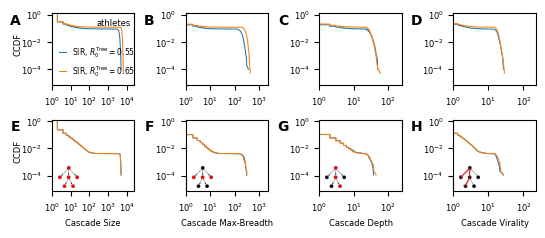

In [33]:
for school in ['Cornell','athletes'] :
    destination='Outputs/'
    example_cascades_networks[model][school]['p-values'] = np.load(destination+'%s_%s_KSpvalues.npy'%(school,model),allow_pickle = True).item()
    example_cascades_networks[model][school]['subsampled'] = np.load(destination+'%s_%s_ExampleCurves.npy'%(school,model),allow_pickle = True).item()

    example_cascades_networks[model][school]['subsampled'][0.55] = example_cascades_networks[model][school]['subsampled'][0.55]
    example_cascades_networks[model][school]['subsampled'][0.65] = example_cascades_networks[model][school]['subsampled'][0.65]
    
    # Examine the KS values
    KS_minimum_and_quantile(example_cascades_networks[model][school]['p-values'],features=['size','depth','max_breadth','virality'],quantile=0.05)
    four_column_CCDF({0.55:example_cascades_networks[model][school]['full'][0.55][0.55],0.65:example_cascades_networks[model][school]['full'][0.65][0.65]},example_cascades_networks[model][school]['subsampled'],keys=[0.55,0.65],plot_colors=['C0','C1'],model_name='SIR',fig_name='Fignetwork_%s'%school,destinations=destinations,school=school)


In [34]:
for school in ['Cornell','athletes'] :
    print("SIR on %s network TABLE"%school)
    print("-----------------------\n\n")
    KS_make_table(cascades_networks[school],example_cascades_networks['SIR'][school]['p-values'],['size','depth','max_breadth','virality'],quantile=0.05)

SIR on Cornell network TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.88 & 1.00 & 1.00 & 1.00 \\
		 Max-Breadth & 0.00 & 0.73 & 1.00 & 0.95 & 1.00 \\
		 Virality & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION \label{sup:tab:INSERT FIGNAME}}
\end{table}
SIR on athletes network TABLE
-----------------------


\begin{table}

	\begin{tabular}{l c c c c c}\\ 

		 \hline
		 Quantity & $p$ (US) & $\min{p}$ (S)  & $\max{p}$ (S) & 95pct of $p$ above (S) & 95pct of $p$ below (S)\\ 
		 \hline
		 Size & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		 Depth & 0.00 & 0.96 & 1.00 & 1.00 & 1.00 \\
		 Max-Breadth & 0.00 & 0.94 & 1.00 & 1.00 & 1.00 \\
		 Virality & 0.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
		\hline
	\end{tabular}
	\caption{INSERT CAPTION